**ВЫПОЛНИЛ ГОРОХОВ Д.Е.**

# **Разведочный анализ по датасету IMDb Movies: 5000 фильмов с наибольшим рейтингом: Анализ количественных и категориальных признаков, а также взаимосвязи признаков**

![](https://adabul.com/wp-content/uploads/2020/04/diziler-360x240.jpg)

## 1. Описание датасета и задания

Представлен датасет с данными о 5000 фильмах, имеющих наибольший рейтинг на сайте IMDb (датасет выложен на платформе [Kaggle](https://www.kaggle.com/datasets/totoro29/imdb-movies)).

***Информация, содержащаяся в датасете:***
1.   Ссылка на постер фильма (poster).
2.   Наименование фильма (title).
3.   Класс фильма по рейтингу the British Board of Film Classification (BBFC) (certificate).
4.   Продолжительность фильма (runtime).
5.   Жанр фильма (genre).
6.   Рейтинг фильма на платформе IMBD (rating).
7.   Описание сюжета фильма (about).
8.   Кинорежиссер фильма (director).
9.   Актеры-звезды фильма (stars).
10.  Количество проголосовавших за фильм (votes).
11.  Доход с фильма (gross_earn).

***Задача:***
провести разведочный анализ данных, найти взаимосвязи и сформулировать выводы.

**В задании выполняется:**
1.   Неграфический и графический анализ количественных признаков.
2.   Неграфический и графический анализ категориальных признаков.
3.   Анализ взаимосвязи двух количественных признаков.
4.   Анализ взаимосвязи двух категориальных признаков.
5.   Анализ взаимосвязи количественного и категориального признаков.

## 2. Загрузка датасета

Импортируется модуль files для подгрузки датасета с ПК

In [ ]:
from google.colab import files

Загружается файл dataset_movies_for_EDA.csv (размещен для скачивания в одном каталоге с данным блокнотом) с помощью files.upload()

In [ ]:
uploaded = files.upload()

Saving movies_clean.csv to movies_clean.csv


## 3. Подгрузка данных в питон и начало работы с ними

Импортируется библиотека pandas с присвоением ей короткого названия pd

In [ ]:
import pandas as pd

Открывается датасет dataset_movies_for_EDA.csv и сохраняется в переменную dataset

In [ ]:
dataset = pd.read_csv('dataset_movies_for_EDA.csv')

Проведится обзор таблицы с помощью метода head()

In [ ]:
dataset.head()

,Unnamed: 0,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,gross_earn_clear,runtime_clear
0,0,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Shawshank Redemption,15,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"('Tim Robbins',), ('Morgan Freeman',), ('Bob G...","26,26,905",$28.34M,2834,142
1,1,https://m.media-amazon.com/images/S/sash/4Fyxw...,Hababam Sinifi,12A,87 min,"Comedy, Drama",9.2,"Lazy, uneducated students share a very close b...",Ertem Egilmez,"('Kemal Sunal',), ('Münir Özkul',), ('Halit Ak...","40,492",NaN,0,87
2,2,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Godfather,X,175 min,"Crime, Drama",9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"('Marlon Brando',), ('Al Pacino',), ('James Ca...","18,19,641",$134.97M,13497,175
3,3,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Godfather: Part II,X,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"('Al Pacino',), ('Robert De Niro',), ('Robert ...","12,49,182",$57.30M,5730,202
4,4,https://m.media-amazon.com/images/S/sash/4Fyxw...,Schindler's List,15,195 min,"Biography, Drama, History",9.0,"In German-occupied Poland during World War II,...",Steven Spielberg,"('Liam Neeson',), ('Ralph Fiennes',), ('Ben Ki...","13,33,407",$96.90M,9690,195


Удаление столбца 'Unnamed: 0' как ненужного с помощью метода drop(), передав в него параметры columns и inplace=True

In [ ]:
dataset.drop(columns='Unnamed: 0', inplace=True)

## 4. Оценка размеров датасета, выбор признаков для анализа

Оценка размеров датасета с помощью атрибута shape

In [ ]:
dataset.shape

(4970, 13)

Вывод информации о датасете с помощью метода info()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   poster            4970 non-null   object 
 1   title             4970 non-null   object 
 2   certificate       4970 non-null   object 
 3   runtime           4970 non-null   object 
 4   genre             4970 non-null   object 
 5   rating            4970 non-null   float64
 6   about             4956 non-null   object 
 7   director          4970 non-null   object 
 8   stars             4970 non-null   object 
 9   votes             4970 non-null   object 
 10  gross_earn        4574 non-null   object 
 11  gross_earn_clear  4970 non-null   int64  
 12  runtime_clear     4970 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 504.9+ KB


**Признаки, которые будут использованы для дальнейшего анализа:**

***Количественные признаки:***
1.   Продолжительность фильма: runtime_clear
2.   Доход с фильма: gross_earn_clear

***Категориальные признаки:***
1.   Наименование фильма: title
2.   Класс фильма: certificate
3.   Жанр фильма: genre
4.   Рейтинг фильма: rating
5.   Кинорежиссер: director
6.   Актеры-звезды фильма: stars


## 5. Неграфический и графический анализ количественных признаков

Выполяется неграфический и графический анализ количественных признаков

### *5.1. gross_earn_clear*

Сохранение Series ['gross_earn_clear'] в переменную gross_earn

In [ ]:
gross_earn = dataset['gross_earn_clear']

Расчет максимального и минимального значения доходов с фильмов с помощью методов max() и min() соответственно. Вывод значения на печать

In [ ]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  93666 Наименьший доход:  0


Фильтруются наблюдения, у которых значение по признаку gross_earn равно 0

In [ ]:
dataset[dataset['gross_earn_clear']==0]

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,gross_earn_clear,runtime_clear
1,https://m.media-amazon.com/images/S/sash/4Fyxw...,Hababam Sinifi,12A,87 min,"Comedy, Drama",9.2,"Lazy, uneducated students share a very close b...",Ertem Egilmez,"('Kemal Sunal',), ('Münir Özkul',), ('Halit Ak...","40,492",NaN,0,87
23,https://m.media-amazon.com/images/S/sash/4Fyxw...,Harakiri,X,133 min,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,Masaki Kobayashi,"('Tatsuya Nakadai',), ('Akira Ishihama',), ('S...","55,599",NaN,0,133
31,https://m.media-amazon.com/images/S/sash/4Fyxw...,It's a Wonderful Life,U,130 min,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,Frank Capra,"('James Stewart',), ('Donna Reed',), ('Lionel ...","4,49,869",NaN,0,130
49,https://m.media-amazon.com/images/S/sash/4Fyxw...,Grave of the Fireflies,12A,89 min,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,Isao Takahata,"('Tsutomu Tatsumi',), ('Ayano Shiraishi',), ('...","2,71,971",NaN,0,89
55,https://m.media-amazon.com/images/S/sash/4Fyxw...,High and Low,12,143 min,"Crime, Drama, Mystery",8.4,An executive of a Yokohama shoe company become...,Akira Kurosawa,"('Toshirô Mifune',), ('Yutaka Sada',), ('Tatsu...","44,136",NaN,0,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,https://m.media-amazon.com/images/S/sash/4Fyxw...,Setup,15,85 min,"Action, Crime, Drama",4.4,A group of friends become involved in a potent...,Mike Gunther,"('50 Cent',), ('Bruce Willis',), ('Ryan Philli...","21,264",NaN,0,85
4885,https://m.media-amazon.com/images/S/sash/4Fyxw...,Starship Troopers 3: Marauder,15,105 min,"Action, Adventure, Sci-Fi",4.3,Johnny Rico is called back into action to defe...,Edward Neumeier,"('Casper Van Dien',), ('Jolene Blalock',), ('S...","23,688",NaN,0,105
4913,https://m.media-amazon.com/images/S/sash/4Fyxw...,Plan 9 from Outer Space,X,79 min,"Horror, Sci-Fi",3.9,Evil aliens attack Earth and set their terribl...,Edward D. Wood Jr.,"('Gregory Walcott',), ('Tom Keene',), ('Mona M...","38,562",NaN,0,79
4952,https://m.media-amazon.com/images/S/sash/4Fyxw...,Troll 2,18,95 min,"Comedy, Fantasy, Horror",2.9,A vacationing family discovers that the entire...,Claudio Fragasso,"('Michael Paul Stephenson',), ('George Hardy',...","32,807",NaN,0,95


Таких значений не так много. Можно их исключить из анализа. Перезаписывается переменная gross_earn, исключая нулевые значения

In [ ]:
gross_earn = dataset[dataset['gross_earn_clear']!=0]['gross_earn_clear']
gross_earn

0        2834
2       13497
3        5730
4        9690
5         436
        ...  
4965     1025
4966     1419
4967        3
4968      492
4969      911
Name: gross_earn_clear, Length: 4558, dtype: int64

Снова рассчитывается максимальное и минимальное значения доходов с фильмов. Вывод значений на печать

In [ ]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  93666 Наименьший доход:  1


Расчет среднего значения признака с помощью метода mean(). Вывод значения на печать

In [ ]:
mean_value = gross_earn.mean()
print('Средний доход с фильма:', round(mean_value, 1))

Средний доход с фильма: 4907.9


Расчет медианного значение признака с помощью метода median(). Вывод значения на печать

In [ ]:
median_value = gross_earn.median()
print('Медиана доходов фильмов:', median_value)

Медиана доходов фильмов: 2834.5


Расчет процентилей (10, 25, 50, 75, 90) с помощью метода quantile(). Вывод значений на печать

In [ ]:
percentile_10_value = gross_earn.quantile(0.10)
percentile_25_value = gross_earn.quantile(0.25)
percentile_50_value = gross_earn.quantile(0.50)
percentile_75_value = gross_earn.quantile(0.75)
percentile_90_value = gross_earn.quantile(0.90)
print('10-й процентиль доходов фильмов: ', percentile_10_value)
print('25-й процентиль доходов фильмов: ', percentile_25_value)
print('50-й процентиль доходов фильмов: ', percentile_50_value)
print('75-й процентиль доходов фильмов: ', percentile_75_value)
print('90-й процентиль доходов фильмов: ', percentile_90_value)

10-й процентиль доходов фильмов:  79.70000000000005
25-й процентиль доходов фильмов:  700.0
50-й процентиль доходов фильмов:  2834.5
75-й процентиль доходов фильмов:  6304.0
90-й процентиль доходов фильмов:  12196.800000000001


Вывод показателей описательной статистики с помощью метода describe()

In [ ]:
round(gross_earn.describe(), 2)

count     4558.00
mean      4907.88
std       6717.17
min          1.00
25%        700.00
50%       2834.50
75%       6304.00
max      93666.00
Name: gross_earn_clear, dtype: float64

Импорт библиотеки matplotlib с расширением pyplot, с присвоением короткого названия plt

In [ ]:
import matplotlib.pyplot as plt

Построение диаграммы "ящик с усами" с помощью метода boxplot()

In [ ]:
#Диаграмма будет построена ниже. Здесь некоторые предварительные изыскания для последующего анализа.
genre_director = dataset[['genre', 'director']] 
genre_director.value_counts()

genre                         director         
Comedy                        Woody Allen          6
Comedy, Drama, Romance        Woody Allen          6
Horror, Mystery, Thriller     James Wan            6
Action, Comedy, Crime         Brett Ratner         6
Animation, Adventure, Comedy  Eric Darnell         5
                                                  ..
Animation, Drama, Family      Yoshifumi Kondô      1
Animation, Drama, Fantasy     Richard Linklater    1
                              Satoshi Kon          1
                              Sylvain Chomet       1
Comedy, Drama                 Roman Polanski       1
Length: 4356, dtype: int64

In [ ]:
#Диаграмма будет построена ниже. Здесь некоторые предварительные изыскания для последующего анализа.
group = dataset.groupby(['director','genre','gross_earn_clear'])['rating'].max().sort_values(ascending=False)
group

director              genre                      gross_earn_clear
Frank Darabont        Drama                      2834                9.3
Ertem Egilmez         Comedy, Drama              0                   9.2
Francis Ford Coppola  Crime, Drama               13497               9.2
Christopher Nolan     Action, Crime, Drama       53486               9.0
Peter Jackson         Action, Adventure, Drama   37785               9.0
                                                                    ... 
Uwe Boll              Action, Adventure, Horror  1025                2.1
Jason Friedberg       Comedy, Sci-Fi             1419                1.9
Robert Iscove         Comedy, Musical, Romance   492                 1.9
Tom Putnam            Comedy, Romance            3                   1.9
Bob Clark             Comedy, Family, Sci-Fi     911                 1.5
Name: rating, Length: 4964, dtype: float64

In [ ]:
#Диаграмма будет построена ниже. Здесь некоторые предварительные изыскания для последующего анализа.
genre_director.describe()

,genre,director
count,4970,4970
unique,346,1954
top,"Comedy, Drama, Romance",Woody Allen
freq,242,38


In [ ]:
#Диаграмма будет построена ниже. Здесь некоторые предварительные изыскания для последующего анализа.
count_genre = dataset['genre'].value_counts()
count_genre

Comedy, Drama, Romance     242
Comedy, Romance            155
Drama                      154
Comedy, Drama              147
Action, Crime, Drama       146
                          ... 
Comedy, Fantasy, Sci-Fi      1
Drama, Horror, Musical       1
Drama, Musical, Sport        1
Drama, Mystery, War          1
Action, Drama, Musical       1
Name: genre, Length: 346, dtype: int64

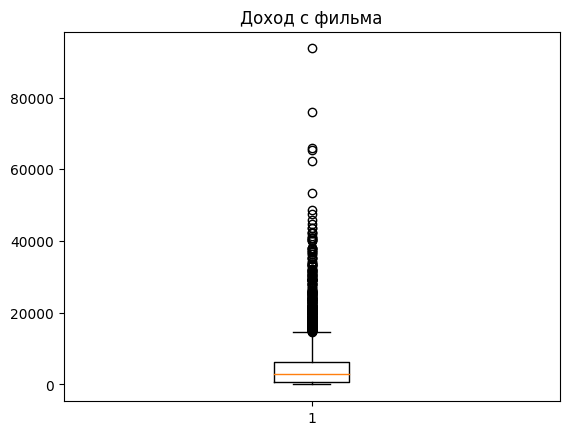

In [ ]:
#Построение диаграммы размаха.
plt.boxplot(gross_earn)
plt.title('Доход с фильма')
plt.show()

Построение гистограммы с помощью метода hist()

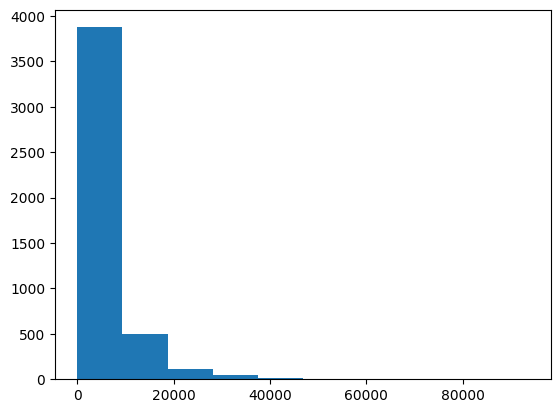

In [ ]:
plt.hist(gross_earn)
plt.show()

Гистограмма показывает, на достаточно большой размах в данных, что подтверждается и показателями описательной статистики (min и max). Необходимо ограничить графический анализ 10 процентилем снизу и 90 процентилем сверху, тем самым обработав часть выбросов, и заново построить "ящик с усами"

In [ ]:
gross_earn_2 = dataset[
    (dataset['gross_earn_clear']>=percentile_10_value)&
    (dataset['gross_earn_clear']<=percentile_90_value)]['gross_earn_clear']

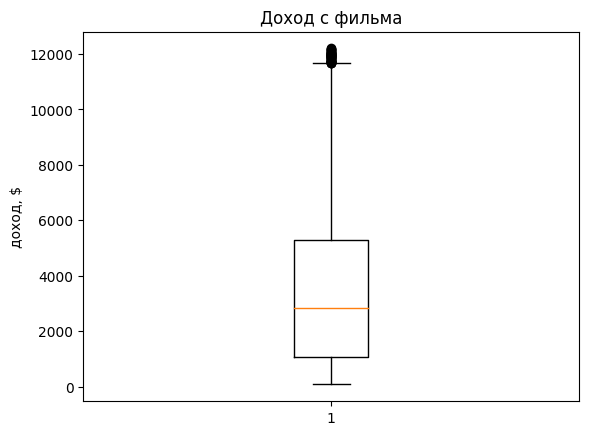

In [ ]:
plt.boxplot(gross_earn_2)
plt.title('Доход с фильма')
plt.ylabel('доход, $')
plt.show()

Также заново строится гистограмма, при этом указывается параметр bins=20 для лучшей визуализации.

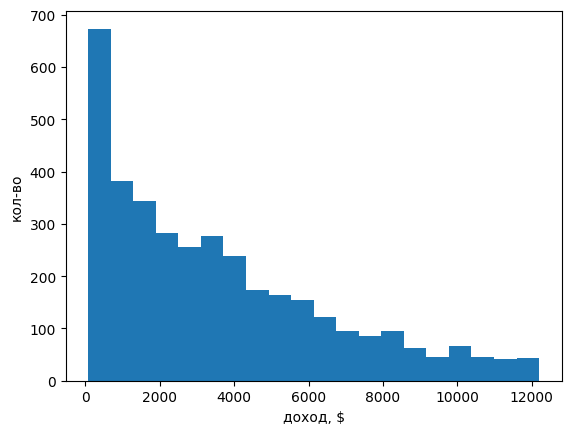

In [ ]:
plt.hist(gross_earn_2, bins=20)
plt.xlabel('доход, $')
plt.ylabel('кол-во')
plt.show()

**Выводы:**

Выводы:
1. Максимальное значение дохода: 93666, минимальное значение дохода: 1. Размах между максимальным и минимальным значение составляет - 93665.
2. В столбце ['gross_earn_clear'] всего значений – 4970, при этом ненулевых значений – 4558, нулевых значений – 412.
Учитывая, что количество нулевых значений минимально и составляет всего 8% от общего количества, принято решение об исключении строк с нулевыми значениями из выборки для дальнейшего анализа.
3. Средний доход с фильма: 4907.9, Медиана доходов фильмов: 2834.5
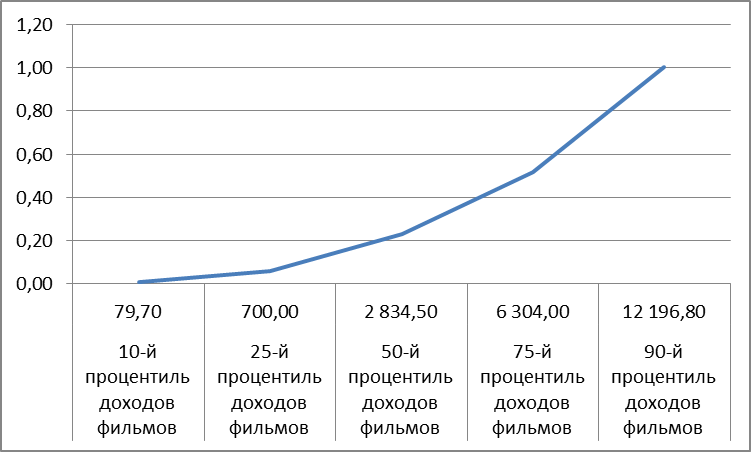

Как видно из графика, медиана (2834,5) составляет лишь 23% от максимального дохода (12196,8), ограниченного рамками 90 процентиля. Такими образом, размах прироста доходов после прохождения точки медианы  составляет 9362,3 (12196,8-2834,5), или почти 4 раза (77%), в то время как абсолютный прирост суммы доходов до медианного значения рос значительно меньшими темпами и составил всего 2758,8 (2834,5-79,7) или 29,4% от прироста доходов после прохождения точки медианы, т.е. менее чем 3,4 раза (9362,3/2755,5). Этим объясняется превышение значения средней величины доходов от фильмов над их медианой.
4. 90% данных не превышают доходы в размере 12196.8; 75% данных не превышают доходы в размере 6304.0; 50% данных не превышают доходы в размере 2834.5; 25% данных не превышают доходы в размере 700.0; 10% данных не превышают доходы в размере 79.7.
5. Боксплот и Гистограмма показывают на достаточно большой размах в данных, что подтверждается и показателями описательной статистики (min и max). Ограничение графиков 10 процентилем снизу и 90 процентилем сверху позволило обработать часть выбросов, и заново успешно визуализировать данные о доходах фильмов.

### **5.2. runtime_clear*

По аналогии проанализируется продолжительность фильмов

In [ ]:
runtime = dataset['runtime_clear']
runtime

0       142
1        87
2       175
3       202
4       195
       ... 
4965     90
4966     87
4967     91
4968     81
4969     88
Name: runtime_clear, Length: 4970, dtype: int64

In [ ]:
min_value_runtime = runtime.min()
max_value_runtime = runtime.max()
print('Наибольшее время фильма: ', max_value_runtime, 'мин.', 'Наименьшее время фильма: ', min_value_runtime, 'мин.' )

Наибольшее время фильма:  366 мин. Наименьшее время фильма:  45 мин.


In [ ]:
runtime.isna().sum()

0

In [ ]:
dataset[dataset['runtime_clear']==0]

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,gross_earn_clear,runtime_clear


In [ ]:
mean_value_runtime = int(runtime.mean())
print('Среднее время фильма: ', mean_value_runtime, 'мин.')

Среднее время фильма:  110 мин.


In [ ]:
median_value_runtime = int(runtime.median())
print('Медиана времени фильма: ', median_value_runtime, 'мин.')

Медиана времени фильма:  106 мин.


In [ ]:
percentile_5_value_runtime = runtime.quantile(0.005)
percentile_25_value_runtime = runtime.quantile(0.25)
percentile_50_value_runtime = runtime.quantile(0.50)
percentile_75_value_runtime = runtime.quantile(0.75)
percentile_95_value_runtime = runtime.quantile(0.95)
print('5-й процентиль времени фильмов: ', percentile_5_value_runtime)
print('25-й процентиль времени фильмов: ', percentile_25_value_runtime)
print('50-й процентиль времени фильмов: ', percentile_50_value_runtime)
print('75-й процентиль времени фильмов: ', percentile_75_value_runtime)
print('95-й процентиль времени фильмов: ', percentile_95_value_runtime)

5-й процентиль времени фильмов:  75.0
25-й процентиль времени фильмов:  96.0
50-й процентиль времени фильмов:  106.0
75-й процентиль времени фильмов:  120.0
95-й процентиль времени фильмов:  148.0


In [ ]:
runtime.describe()

count    4970.000000
mean      110.267606
std        21.441886
min        45.000000
25%        96.000000
50%       106.000000
75%       120.000000
max       366.000000
Name: runtime_clear, dtype: float64

In [ ]:
rt = dataset[
    (dataset['runtime_clear']>=55)&
    (dataset['runtime_clear']<=155)]['runtime_clear']

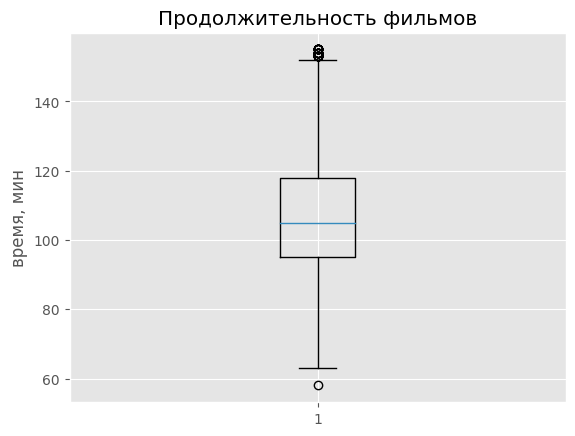

In [ ]:
plt.style.use('ggplot')
plt.boxplot(rt)
plt.title('Продолжительность фильмов')
plt.ylabel('время, мин')
plt.show()

<ipython-input-40-1ad15ca3361d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


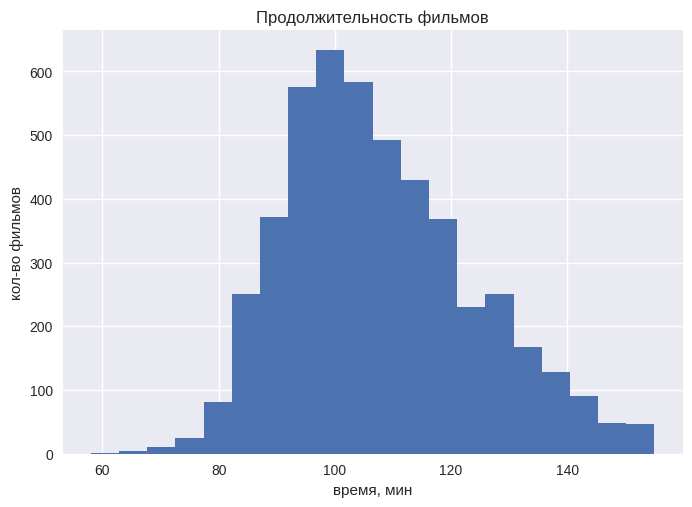

In [ ]:
plt.style.use('seaborn')
plt.hist(rt, bins=20)
plt.title('Продолжительность фильмов')
plt.xlabel('время, мин')
plt.ylabel('кол-во фильмов')
plt.show()

## 6. Неграфический и графический анализ категориальных признаков

Выполняется неграфический и графический анализ категориальных признаков

### *6.1. certificate*

Описание классификации [the British Board of Film Classification (BBFC)]( https://www.bbfc.co.uk/about-classification/classification-guidelines)

Проводится оценка описательных статистик признака с помощью метода describe()

In [ ]:
dataset['certificate'].describe()

count     4970
unique      15
top         15
freq      1843
Name: certificate, dtype: object

Получение уникальных значений признака с помощью метода unique()

In [ ]:
dataset['certificate'].unique()

array(['15', '12A', 'X', 'U', '18', 'PG', '12', 'A', 'AA', 'R',
       'Not Rated', 'Rejected', 'UA', 'PG-13', '(Banned)'], dtype=object)

Проведится неграфический структурный анализ с помощью метода value_counts()

In [ ]:
dataset['certificate'].value_counts()

15           1843
12A           788
18            659
PG            614
U             362
12            278
A             186
X             134
AA             59
R              12
UA             11
PG-13          11
Not Rated       7
Rejected        5
(Banned)        1
Name: certificate, dtype: int64

Сохраняются результаты работы метода value_counts() в переменную certificate_counts, отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True) (это необходимо для того, чтобы впоследствии столбчатая диаграмма сортировала значения сверху вниз: наибольшее - сверху, наименьшее - снизу)

In [ ]:
certificate_counts = dataset['certificate'].value_counts().sort_values(ascending=True)
certificate_counts

(Banned)        1
Rejected        5
Not Rated       7
UA             11
PG-13          11
R              12
AA             59
X             134
A             186
12            278
U             362
PG            614
18            659
12A           788
15           1843
Name: certificate, dtype: int64

Построение горизонтальной столбчатой диаграммы с помощью метода barh()

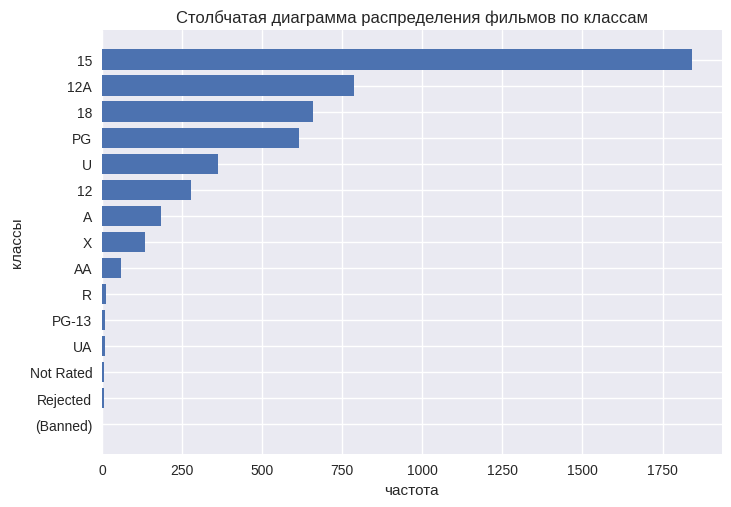

In [ ]:
plt.barh(certificate_counts.index, certificate_counts.values)
plt.title('Столбчатая диаграмма распределения фильмов по классам')
plt.xlabel('частота')
plt.ylabel('классы')
plt.show()

Выделение топ-5 классов, по которым больше всего фильмов и сохранение результата в переменную certificate_counts_top_5

In [ ]:
certificate_counts_top_5 = dataset['certificate'].value_counts()[:5]
certificate_counts_top_5

15     1843
12A     788
18      659
PG      614
U       362
Name: certificate, dtype: int64

Построение круговой диаграммы с помощью метода pie(), добавив подписи данных с помощью параметра labels и подписи значений с помощью параметра autopct='%.1f' (проценты с одним знаком после запятой)

P.s. При анализе категориальных признаков если категорий не больше 5, то предпочтительна круговая диаграмма, в ином случае - столбчатая

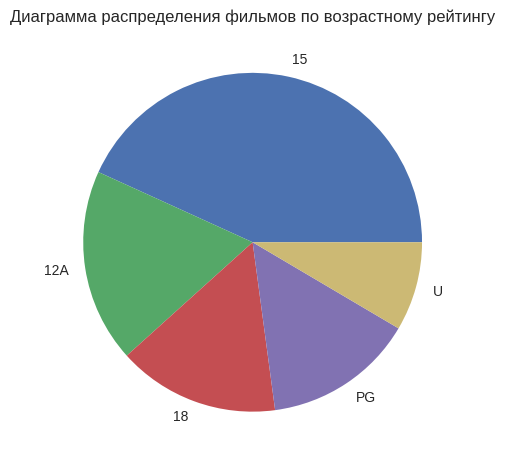

In [ ]:
plt.pie(certificate_counts_top_5.values, labels=certificate_counts_top_5.index)
plt.title('Диаграмма распределения фильмов по возрастному рейтингу')
plt.show()

**Выводы:**

Выводы:
1. Количество уникальных значений исследуемого признака равно 15
count - 4970
unique -15
top -15
freq -1843

2. Наиболее часто встречаемое значение признака: «Разрешено для просмотра лицам в возрасте 15 лет и старше», встречается 1843 раза.

3. Распределяются значения признака следующим образом:
15 - 1843;
12A - 788;
18 - 659;
PG - 614;
U - 362;
12 - 278;
A - 186;
X - 134;
AA - 59;
R - 12;
UA - 11;
PG-13 - 11;
Not Rated - 7;
Rejected - 5;
(Banned) - 1.

4. Графический анализ (столбчатая и круговая диаграммы) топ признаков показывает значительный отрыв значений класса 15 от остальных классов. Три последующих класса (12А, 18, PG) имеют приблизительно равные доли (в диапазоне от 14 до 18% от всех фильмов ТОП-5), замыкает пятерку лидеров, фильмы в прокате с сертификатом U (8%) 
Топ 5 классов:
15 - 1843;
12A - 788;
18 - 659;
PG - 614;
U - 362.

### **6.2. rating*

По аналогии проанализирован рейтинг фильмов

In [ ]:
dataset['rating'].describe()

count    4970.000000
mean        6.694004
std         0.967945
min         1.500000
25%         6.100000
50%         6.800000
75%         7.400000
max         9.300000
Name: rating, dtype: float64

In [ ]:
dataset['rating'].unique()

array([9.3, 9.2, 9. , 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. ,
       7.9, 7.8, 7.7, 7.6, 7.5, 7.4, 7.3, 7.2, 7.1, 7. , 6.9, 6.8, 6.7,
       6.6, 6.5, 6.4, 6.3, 6.2, 6.1, 6. , 5.9, 5.8, 5.7, 5.6, 5.5, 5.4,
       5.3, 5.2, 5.1, 5. , 4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2, 4.1,
       4. , 3.9, 3.8, 3.7, 3.6, 3.5, 3.4, 3.3, 3.1, 3. , 2.9, 2.8, 2.6,
       2.5, 2.4, 2.3, 2.2, 2.1, 1.9, 1.5])

In [ ]:
dataset['rating'].value_counts()

6.7    221
6.4    218
6.6    209
7.2    207
7.0    206
      ... 
2.1      1
9.3      1
2.3      1
8.9      1
1.5      1
Name: rating, Length: 72, dtype: int64

In [ ]:
dataset['rating'].value_counts().head(30)

6.7    221
6.4    218
6.6    209
7.2    207
7.0    206
7.3    202
6.2    199
7.1    198
6.8    191
6.9    186
6.5    182
7.5    177
7.4    177
6.1    172
6.3    170
7.6    163
7.7    158
5.8    128
7.8    128
6.0    118
8.0    116
8.1    114
7.9    109
5.9    108
5.6    103
5.7     90
5.5     84
5.4     68
5.3     60
8.2     58
Name: rating, dtype: int64

In [ ]:
rating_counts = dataset['rating'].value_counts()[:3]
rating_counts

6.7    221
6.4    218
6.6    209
7.2    207
7.0    206
      ... 
2.4      2
2.5      2
2.8      2
9.2      2
3.0      2
Name: rating, Length: 64, dtype: int64

In [ ]:
%matplotlib inline

<ipython-input-54-57cd9524ca02>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


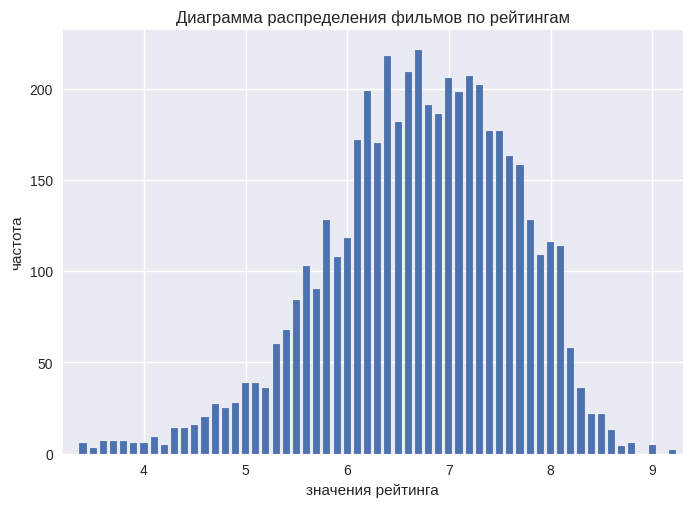

In [ ]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
plt.bar(rating_counts.index, rating_counts.values, width=0.07, edgecolor="white", linewidth=0.1);
ax.set(xlim=(3.2, 9.3))
plt.title('Диаграмма распределения фильмов по рейтингам')
plt.xlabel('значения рейтинга')
plt.ylabel('частота')
plt.show()

In [ ]:
rating_counts_top_5 = dataset['rating'].value_counts().sort_index(ascending=True)
rating_counts_top_5

1.5    1
1.9    3
2.1    1
2.2    1
2.3    1
      ..
8.8    6
8.9    1
9.0    5
9.2    2
9.3    1
Name: rating, Length: 72, dtype: int64

In [ ]:
dataset['rating'].unique().sum()

404.5

In [ ]:
a1 = [i for i in range(1,10)]
ddd=dict.fromkeys(a1)
for i in range(1, len(a1)+1):
  ddd[i]=0
for i, j in zip(rating_counts_top_5.index, rating_counts_top_5.values):  
  ddd[int(i)] += j
ddd

{1: 4, 2: 14, 3: 42, 4: 164, 5: 755, 6: 1866, 7: 1725, 8: 392, 9: 8}

In [ ]:
p = pd.DataFrame({'значения': ddd.values(), 'ключи': ddd.keys()})
p = p.set_index('ключи')
for i, j in zip(p.index, p['значения']):
  print(i,'---', j)

1 --- 4
2 --- 14
3 --- 42
4 --- 164
5 --- 755
6 --- 1866
7 --- 1725
8 --- 392
9 --- 8


In [ ]:
#Дифференцируются значения >100
#Консолидируются значения <100
val = p[p['значения']>100]
other_val = p[p['значения']<100]
temp_val = pd.DataFrame({'значения': other_val['значения'].sum()}, index=[tuple(other_val.index)])
val = val.append(temp_val)
index_list=list(val.index.values)
val['ключи'] = index_list
val.set_index('ключи', inplace=True)
val

<ipython-input-248-b50c714d5215>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  val = val.append(temp_val)


,значения
ключи,
4,164
5,755
6,1866
7,1725
8,392
"(1, 2, 3, 9)",68


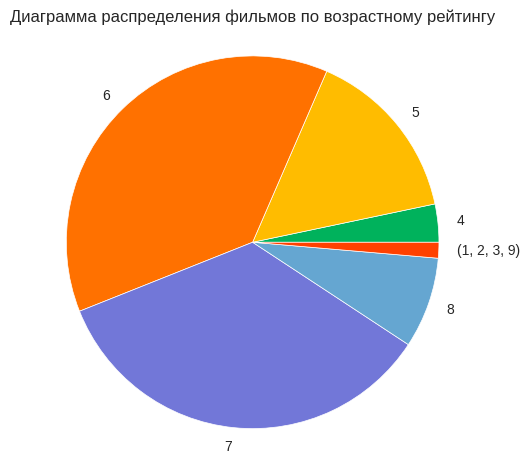

In [ ]:
fig, ax = plt.subplots()
colors=['#00B25C', '#FFBC00', '#FF7100','#7277D8','#65A6D1','#FF4100']
ax.pie(val['значения'], labels=val.index, colors=colors, radius=1.1, wedgeprops={"linewidth": 0.5, "edgecolor": "white"}, frame=False)
plt.title('Диаграмма распределения фильмов по возрастному рейтингу')
plt.show()

## 7. Анализ взаимосвязи двух количественных признаков

Выполняется анализ взаимосвязи двух количественных признаков

### *7.1. runtime_clear - gross_earn_clear*

Импортируется библиотека seaborn с присвоением ей короткого названия sns

In [ ]:
import seaborn as sns

Построение диаграммы совместного распределения двух количественных переменных с помощью функции jointplot(), передав параметры size и alpha для улучшения визуализации

In [ ]:
dataset['gross_earn_clear'].value_counts

<bound method IndexOpsMixin.value_counts of 0        2834
1           0
2       13497
3        5730
4        9690
        ...  
4965     1025
4966     1419
4967        3
4968      492
4969      911
Name: gross_earn_clear, Length: 4970, dtype: int64>

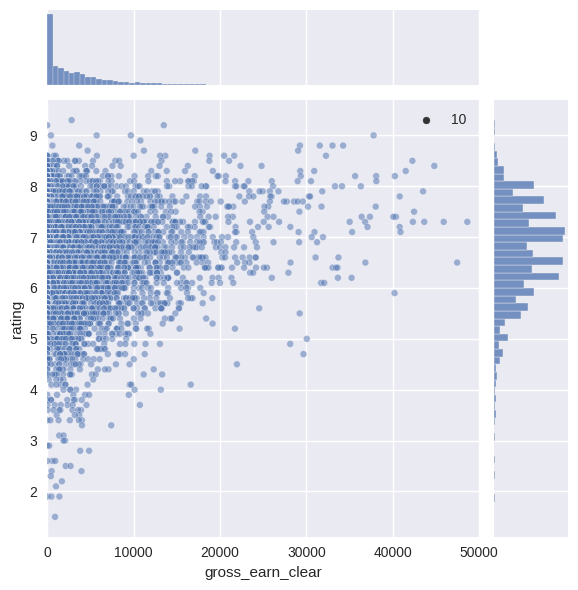

In [ ]:
sns.jointplot(x=dataset['gross_earn_clear'], y=dataset['rating'], size=10, alpha=0.5)
plt.axis(xmin=0, xmax=50000)
plt.show()

Сохранение колонки 'runtime_clear' и 'gross_earn_clear' в переменную columns и построение диаграммы рассеяния, используя функции PairGrid(), map() и метод scatterplot с параметром alpha для улучшения визуализации

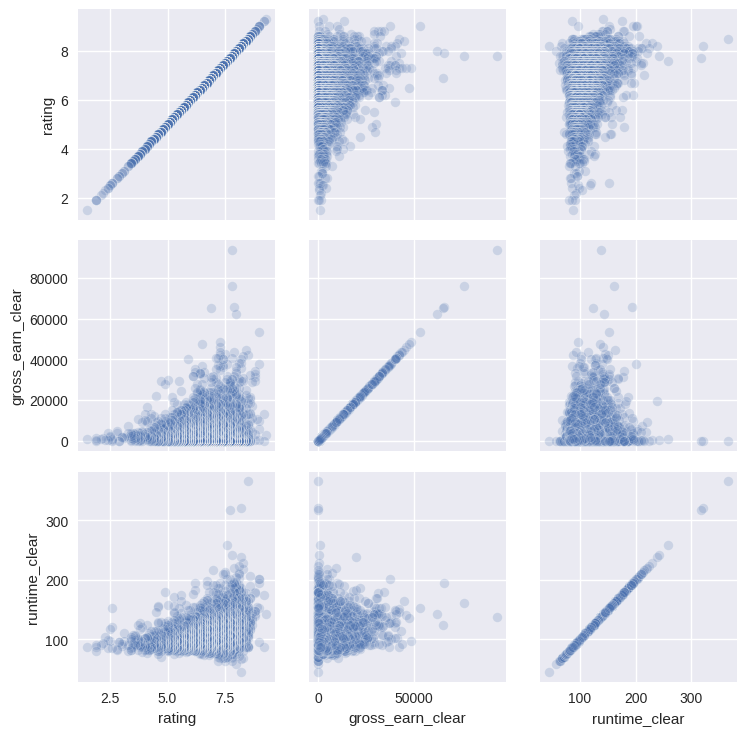

In [ ]:
columns = ['runtime_clear', 'gross_earn_clear']
g = sns.PairGrid(dataset)
g.map(sns.scatterplot, alpha=0.2)

Исключаются выбросы с помощью фильтрации датасета по 99% процентилю. Сохраняется копия исходного датасета в переменную new_dataset с помощью метода copy(). Для каждой колонки в columns ограничиваются значения 99% процентилем с помощью метода quantile(), сохраняя объект Series в переменную limiter и фильтруя new_dataset по данному ограничению с помощью оператора <=

In [ ]:
columns = ['rating', 'gross_earn_clear', 'runtime_clear']
new_dataset = dataset.copy()
for col in columns:
  limiter = new_dataset[col].quantile(0.99)
  new_dataset = new_dataset[new_dataset[col]<=limiter]

Построение диаграммы рассеяния по данным датасета new_dataset, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

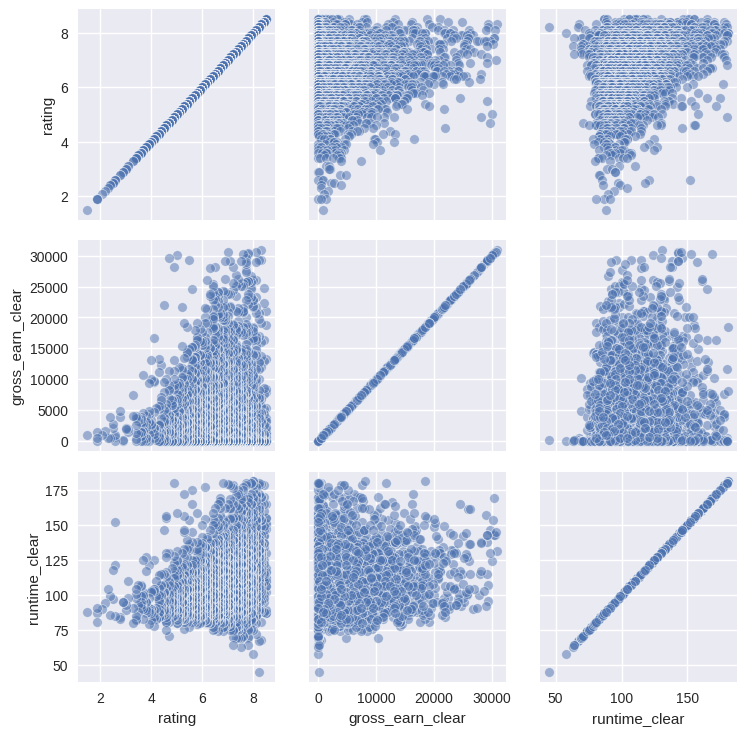

In [ ]:
g = sns.PairGrid(new_dataset)
g.map(sns.scatterplot, alpha=0.5)

**Выводы:**

Выводы:

1. Согласно диаграмме совместного распределения двух количественных переменных с помощью функции jointplot(), максимальная кучность значений по признакам доход-рейтинг наблюдается в диапазоне от 6 до 8 по рейтинговой шкале и от 0 до 12000 по шкале доходов от фильмов. Соответственно, как в данных границах так и выше по диаграмме не прослеживается линейная зависимость роста доходов от рейтинга фильмов.

  Продолжительность фильмов также не оказывает влияние (показатель не находится в корреляционной зависимости) на рейтинг и доходы от фильмов.

## 8. Анализ взаимосвязи двух категориальных признаков

Выполяется анализ взаимосвязи двух категориальных признаков

### *8.1. director - certificate*

Сохранение уникальных значений признака 'director', определенных с помощью метода unique(), в переменную directors и определение их количества с помощью функции len()

In [ ]:
directors = dataset['director'].unique()
len(directors)

1954

Проводится неграфический структурный анализ признака с помощью метода value_counts()

In [ ]:
dataset['director'].value_counts

<bound method IndexOpsMixin.value_counts of 0             Frank Darabont
1              Ertem Egilmez
2       Francis Ford Coppola
3       Francis Ford Coppola
4           Steven Spielberg
                ...         
4965                Uwe Boll
4966         Jason Friedberg
4967              Tom Putnam
4968           Robert Iscove
4969               Bob Clark
Name: director, Length: 4970, dtype: object>

Определяется топ-5 кинорежиссеров с помощью метода value_counts() и среза, выводится их список при помощи атрибута index и сохраняется в переменную directors_top_5

In [ ]:
directors_top_5 = dataset['director'].value_counts()[:5].index
directors_top_5

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Alfred Hitchcock',
       'Ridley Scott'],
      dtype='object')

Для корректного визуального представления распределения признака 'certificate' создается словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20. Для этого в переменную labels сохраняются уникальные значения признака, затем в переменную colors сохраняется словарь, сформированный с помощью функции dict() из объединенных (с помощью функции zip()) попарно значения классов, сохраненных в переменной labels, и цветов из палитры tab20, выбранных по длине (len()) labels, с помощью выражения plt.cm.tab20.colors

In [ ]:
labels = dataset['certificate'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{'15': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 '12A': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'X': (1.0, 0.4980392156862745, 0.054901960784313725),
 'U': (1.0, 0.7333333333333333, 0.47058823529411764),
 '18': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'PG': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 '12': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'A': (1.0, 0.596078431372549, 0.5882352941176471),
 'AA': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'R': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'Not Rated': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'Rejected': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'UA': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'PG-13': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 '(Banned)': (0.4980392156862745, 0.4980392156862745, 0.49803

Для каждого кинорежиссера из топ-5 (directors_top_5) осуществляется построение круговых диаграмм с помощью метода pie(). Для этого фильтруется исходный датасет признаку director и сохраняется в переменную df; сохраняется топ-5 классов фильмов (certificate), определенных с помощью метода value_counts() и среза, в переменную certificate_counts; выводится список уникальных значений топ-5 классов с помощью атрибута index и сохраняется в переменную labels; в качестве названия диаграммы указывается кинорежиссер с помощью метода title(); Осуществляется построение диаграммы, передав в нее в качестве параметров значения (values), подписи (labels), цвета (colors) и подписи значения в виде процентов autopct='%.1f'

In [ ]:
for director in directors_top_5:
  df = dataset[dataset['director']==director]  

In [ ]:
certificate_counts = df['certificate'].value_counts()[:5].index
certificate_counts

Index(['15', '12A', '18', 'X', 'AA'], dtype='object')

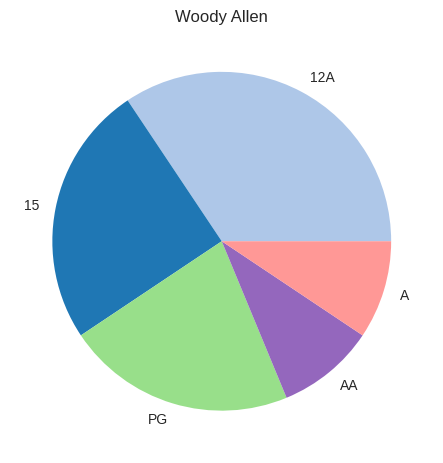

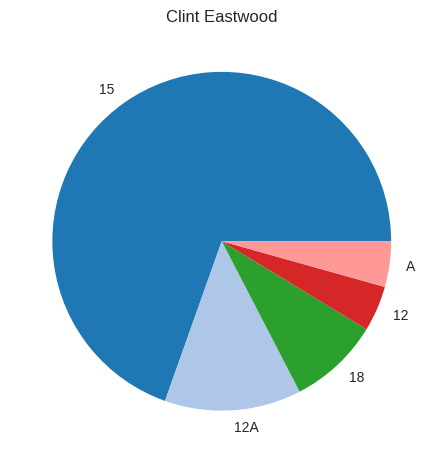

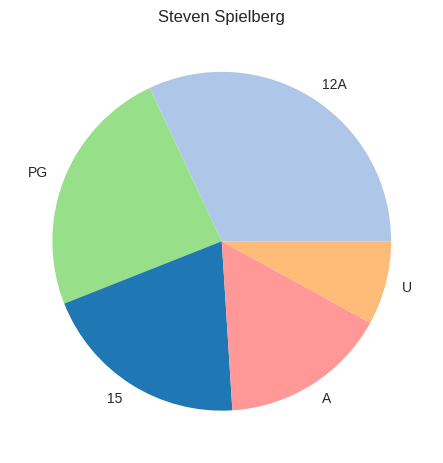

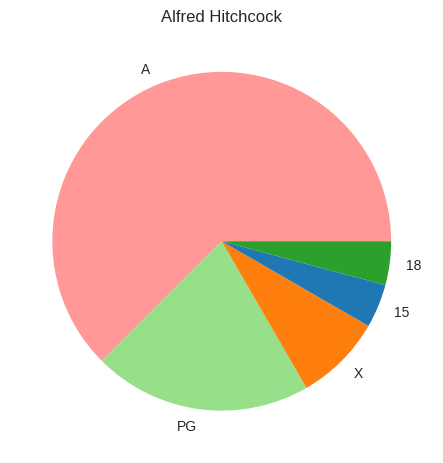

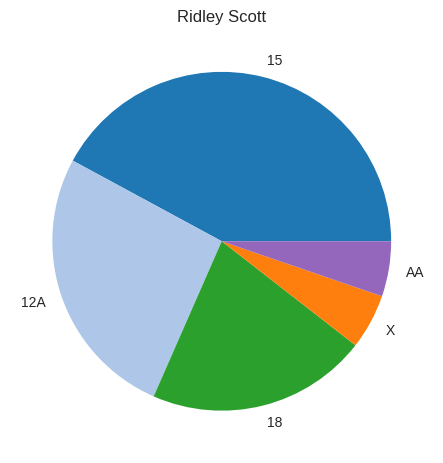

In [ ]:
for director in directors_top_5:
  df = dataset[dataset['director']==director] 
  certificate_counts = df['certificate'].value_counts()[:5]
  labels_cert = certificate_counts.index
  plt.title(director)
  plt.pie(certificate_counts, labels=labels_cert, colors=[colors[key] for key in labels_cert])
  plt.show()

**Выводы:**

Выводы:

1. В датасете имеется 15 классов фильмов(certificate): «15», «12A», «X», «U», «18», «PG», «12», «A», «AA», «R», «Not Rated», «Rejected», «UA», «PG-13», «(Banned)».
Топ-5 режиссеров снимают фильмы, которые распределяются по 10 классам: «15», «12A», «18», «X», «AA», «PG», «A», «18», «12», «U». Так, например:
Woody Allen (12A, 15, PG, AA, A)
Clint Eastwood (15, 12A, 18, 12, A)
Steven Spielberg (12A, PG, 15, A, U)
Alfred Hitchcock (A, PG, X, 15, 18)
Ridley Scott (15, 12A, 18, X, AА).
При этом наблюдается следующее:
класс: 15 присутствует у всех режиссеров;
класс: 12А присутствуют у 4 режиссеров (Woody Allen, Clint Eastwood, Steven Spielberg, Ridley Scott);
класс: А присутствуют у 4 режиссеров (Woody Allen, Clint Eastwood, Steven Spielberg, Alfred Hitchcock);
класс: PG присутствуют у 3 режиссеров (Woody Allen, Steven Spielberg, Alfred Hitchcock);
класс: 18 присутствует у 3 режиссеров (Clint Eastwood, Alfred Hitchcock, Ridley Scott);
класс: X присутствуют у 2 режиссеров (Alfred Hitchcock, Ridley Scott);
класс: АА присутствуют у 2 режиссеров (Woody Allen, Ridley Scott);
классы: 12, U присутствуют у 1 режиссера (соответственно: Clint Eastwood, Steven Spielberg);

2. Woody Allen (12A, 15, PG, A, AA).
Согласно круговой диаграмме классов фильмов режиссера Woody Allen основной вес (порядка 80%) составляют фильмы, распределенные в равных долях по классам 12A, 15, PG. Порядка 20% приходится на классы A, AA. 
Clint Eastwood (15, 12A, 18, 12, A).
Согласно круговой диаграмме классов фильмов режиссера Clint Eastwood основной вес (порядка 80%) составляют фильмы, с классами 15, 12A. Причем из 80% фильмов порядка 70% составляют фильмы с классом 15. На классы 18, 12, A приходится около 20% фильмов.
Steven Spielberg (12A, PG, 15, A, U).
Согласно круговой диаграмме классов фильмов режиссера Steven Spielberg основной вес (порядка 75%) составляют фильмы, распределенные в равных долях по классам 12A, 15, PG. Порядка 20% приходится на классы A, U.
Alfred Hitchcock (A, PG, X, 15, 18).
Согласно круговой диаграмме классов фильмов режиссера Alfred Hitchcock основной вес (порядка 80%) составляют фильмы, распределенные в равных долях по классам A, PG. Причем из 80% фильмов порядка 60% составляют фильмы с классом A. На классы 18, 15, X приходится около 20% фильмов.
Ridley Scott (15, 12A, 18, X, A).
Согласно круговой диаграмме классов фильмов режиссера Ridley Scott основной вес (порядка 85%) составляют фильмы с классами 15,12,18. Причем из 85% фильмов порядка 45% составляют фильмы с классом 15, на фильмы с классами 12,18 приходится приблизительно по 20%. На классы 18, 15, X приходится около 20% фильмов.

## 9. Анализ взаимосвязи количественного и категориального признаков

Выполняется анализ взаимосвязи категориального и количественного признаков

### *9.1. certificate - gross_earn_clear*

Осуществляется оценка медианных значений доходов с фильмов в разрезе классов фильмов. Для этого сгруппируется датасет по признаку certificate с помощью метода groupby и к Series ['gross_earn_clear'] метод median()

In [ ]:
dataset.groupby('certificate')['gross_earn_clear'].median().sort_values(ascending=False)

certificate
UA           5423.0
U            4805.0
PG           4194.5
12           4083.0
12A          3994.0
AA           2103.0
15           1630.0
18           1253.0
X             810.0
A             416.5
PG-13         199.0
R              70.5
Rejected        3.0
Not Rated       2.0
(Banned)        0.0
Name: gross_earn_clear, dtype: float64

Оцениваются описательные статистики доходов с фильмов в разрезе классов фильмов, осуществляется группировка с применением метода describe()

In [ ]:
dataset.groupby('certificate')['gross_earn_clear'].describe().sort_values('max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
certificate,,,,,,,,
12A,788.0,7426.950508,9941.070370,0.0,1277.75,3994.0,9200.00,93666.0
12,278.0,5816.694245,6656.992111,0.0,1717.25,4083.0,7146.25,65933.0
U,362.0,7767.522099,9147.937789,0.0,1151.25,4805.0,10504.50,48630.0
PG,614.0,6057.100977,6653.811772,0.0,1496.75,4194.5,7718.25,40245.0
18,659.0,2422.506829,3391.268776,0.0,108.00,1253.0,3493.00,37078.0
15,1843.0,3120.110689,4189.535508,0.0,182.50,1630.0,4273.00,36307.0
A,186.0,2567.838710,4489.452104,0.0,0.00,416.5,3352.00,26000.0
X,134.0,1845.910448,3016.208997,0.0,6.00,810.0,2500.00,23291.0
UA,11.0,7193.909091,5710.948108,1070.0,2815.00,5423.0,10422.00,18403.0


Построение диаграммы "ящик с усами" с помощью метода boxplot() с передачей в качестве "x" - значения классов, а в качестве "y" - дохода фильмов

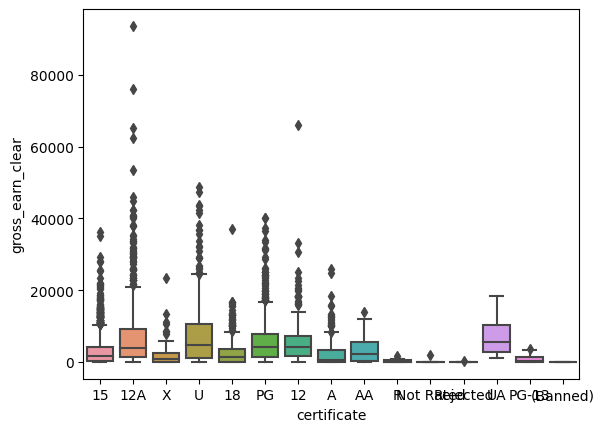

In [ ]:
sns.boxplot(x=dataset['certificate'], y=dataset['gross_earn_clear'], data=dataset)
plt.show()

Диаграмма получилась малоинформативна в связи с наличием выбросов, а также ее нагруженностью по количеству значений классов. Необходимо оценить количество значений классов с помощью метода value_counts()

In [ ]:
dataset['certificate'].value_counts()

15           1843
12A           788
18            659
PG            614
U             362
12            278
A             186
X             134
AA             59
R              12
UA             11
PG-13          11
Not Rated       7
Rejected        5
(Banned)        1
Name: certificate, dtype: int64

По итогу оценки видно, что крупных классов - 8, поэтому ограничим диаграмму топ-8 классов. Для этого сохраняется список топ-8 классов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную certificate_list

In [ ]:
certificate_list = dataset['certificate'].value_counts()[:8].index
certificate_list

['15', '12A', '18', 'PG', 'U', '12', 'A', 'X']

Фильтруется исходный датасет по признаку certificate с помощью метода isin() и сохраняется в переменную dataset_certificate_top_8. Оценивается размер датасета с помощью атрибута shape

In [ ]:
dataset_certificate_top_8 = dataset[dataset['certificate'].isin(certificate_list)]
dataset_certificate_top_8.shape

(4864, 13)

Построение диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве "x" - значения классов, а в качестве "y" - доход с фильмов, при этом ограничив значение оси x на 25000 млн.$ с помощью функции plt.axis() и параметров ymin и ymax

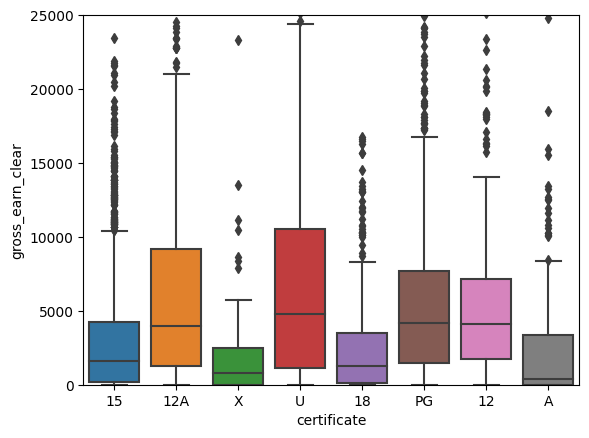

In [ ]:
sns.boxplot(x='certificate', y='gross_earn_clear', data=dataset_certificate_top_8)
plt.axis(ymin=0, ymax=25000)
plt.show()

**Выводы:**

Выводы:

1. Согласно диаграмме «Ящик с усами» имеет место хаотичное распределение рассматриваемых признаков (классов) по шкале полученных доходов. Отсюда следует, что связь между классами фильмов и доходами от фильмов не прослеживается.
2. На диаграмме отчетливо наблюдается широкий диапазон распределения доходов фильмов по каждому классу (наличие «длинных усов»). Кроме того, на диаграмме в 4 классах (12А, U, PG, 12) квантили имеют наибольшую высоту, а в 4 классах (15, Х, 18, А) высота квантилей наименьшая.
3. Согласно диаграмме «Ящик с усами» имеет место хаотичное распределение медианы относительно шкалы полученных доходов. Так, например, наиболее часто встречающийся класс «15» незначительно превосходит по уровню доходов класс «А», отранжированный на 8 месте по частоте наблюдения. Между тем, класс «U», превосходящий остальные классы выборки по уровню доходов располагается в середине списка, отсортированного по величине частоты наблюдения. По признаку доходов медиану можно сгруппировать на 2 группы из 4 элементов. Так, из восьми классов в 4 классах (12А, U, PG, 12) медиана располагается в диапазоне от 4000 до 5100, в другой группе из 4 классов (15, Х, 18, А) медиана находится в диапазоне от 1250 до 2100.


## 10. Общий вывод

Итоговый вывод по разведочному анализу

Общий вывод:

В столбце ['gross_earn_clear'] всего значений – 4970, при этом ненулевых значений – 4558, нулевых значений – 412. Учитывая, что количество нулевых значений минимально и составляет всего 8% от общего количества, принято решение об исключении строк с нулевыми значениями из выборки для дальнейшего анализа.

Максимальное значение дохода: 93666, минимальное значение дохода: 1. Размах между максимальным и минимальным значение составляет - 93665.
90% данных не превышают доходы в размере 12196.8; 75% данных не превышают доходы в размере 6304.0; 50% данных не превышают доходы в размере 2834.5; 25% данных не превышают доходы в размере 700.0; 10% данных не превышают доходы в размере 79.7.
Боксплот и Гистограмма показывают на достаточно большой размах в данных, что подтверждается и показателями описательной статистики (min и max). 

По признаку «certificate» наиболее часто встречаемое значение класса: «Разрешено для просмотра лицам в возрасте 15 лет и старше», встречается 1843 раза. В целях дальнейшего исследования осуществлена выборка топ-5 классов: 15 – 1843, 12A – 788, 18 – 659, PG – 614, U – 362.
Графический анализ (столбчатая и круговая диаграммы) топ-5 признаков показывает значительный вес частоты значений фильмов с классом 15 от остальных классов (составляет 43% от всех фильмов ТОП-5). Три последующих класса (12А, 18, PG) имеют приблизительно равные доли (в диапазоне от 14 до 18% от всех фильмов ТОП-5), замыкают пятерку лидеров, фильмы в прокате с сертификатом U (8%).

Согласно диаграмме совместного распределения двух количественных переменных с помощью функции jointplot(), не прослеживается линейная зависимость роста доходов от рейтинга фильмов. Продолжительность фильмов также не оказывает влияние на рейтинг и доходы от фильмов.

В датасете имеется 15 классов фильмов(certificate): «15», «12A», «X», «U», «18», «PG», «12», «A», «AA», «R», «Not Rated», «Rejected», «UA», «PG-13», «(Banned)».
Топ-5 режиссеров снимают фильмы, которые распределяются по 10 классам: «15», «12A», «18», «X», «AA», «PG», «A», «18», «12», «U». При этом наблюдается следующее: класс: 15 присутствует у всех режиссеров; класс: 12А присутствуют у 4 режиссеров (Woody Allen, Clint Eastwood, Steven Spielberg, Ridley Scott); класс: А присутствуют у 4 режиссеров (Woody Allen, Clint Eastwood, Steven Spielberg, Alfred Hitchcock); класс: PG присутствуют у 3 режиссеров (Woody Allen, Steven Spielberg, Alfred Hitchcock); класс: 18 присутствует у 3 режиссеров (Clint Eastwood, Alfred Hitchcock, Ridley Scott).

Согласно диаграмме «Ящик с усами» имеет место хаотичное распределение рассматриваемых признаков (классов) по шкале полученных доходов. Отсюда следует, что связь между классами фильмов и доходами от фильмов не прослеживается.
На диаграмме отчетливо наблюдается широкий диапазон распределения доходов фильмов по каждому классу (наличие «длинных усов»). Кроме того, на диаграмме в 4 классах (12А, U, PG, 12) квантили имеют наибольшую высоту, а в 4 классах (15, Х, 18, А) высота квантилей наименьшая.
Согласно диаграмме «Ящик с усами» имеет место хаотичное распределение медианы относительно шкалы полученных доходов. Так, например, наиболее часто встречающийся класс «15» незначительно превосходит по уровню доходов класс «А», отранжированный на 8 месте по частоте наблюдения.
По признаку доходов медиану можно сгруппировать на 2 группы из 4 элементов. Так, из восьми классов в 4 классах (12А, U, PG, 12) медиана располагается в диапазоне от 4000 до 5100, в другой группе из 4 классов (15, Х, 18, А) медиана находится в диапазоне от 1250 до 2100.